# Práctica 2

- Mitchell Mirano Caro


Vamos a resolver la siguiente EDP de manera discreta 
$$u_{tt}(x,t) = u_{xx}(x,t) + e^{-t}, x \in [0,\pi] 1$$

$$u(0,t) = e^{-t}$$
$$u(x,0) = 3\sin(x) +1 = f(x)  $$
$$ u_t(x,0) = -1 = g(x) $$
$$u_x(\pi,t) = -3\cos(t) $$

Siguiendo el método implicito

con la forma:

$$Au^{j+1} = Bu^{j-1} + 2u^{j} + C$$

In [1]:
using Printf, LinearAlgebra, Plots

Programando el Método de Crou para resolver un sistema tridiagonal

In [2]:
function lu_descomposition(A::Tridiagonal{Float64, Vector{Float64}})
    
    n = length(A[1,:])
    L = zeros(n,n)
    U = zeros(n,n)

    
    L[1,1] = A[1,1]
    U[1,1] = 1
    U[1,2] = A[1,2]/L[1,1]

    for i in 2:n

        if i < n
            U[i,i] = 1
            L[i,i-1] = A[i-1,i]
            L[i,i] = A[i,i] - L[i,i-1]*U[i-1,i]
            U[i,i+1] =A[i,i+1]/L[i,i]
        end

        if i == n
            U[i,i] = 1
            L[i,i-1] = A[i-1,i]
            L[i,i] = A[i,i] - L[i,i-1]*U[i-1,i]
        end

    end
    
    return L, U
end

function crou_method(A::Tridiagonal{Float64, Vector{Float64}},b::Vector{Float64})
    
    n = length(b)
    L,U = lu_descomposition(A)
    
    z = zeros(n)
    z[1] = b[1]/L[1,1]

    for i in 2:n
        z[i] = b[i]/L[i,i] - L[i,i-1]*z[i-1]/L[i,i]
    end

    x = zeros(n)
    x[n] = z[n]

    for i in n:-1:2
        x[i-1] = z[i-1] - U[i-1,i]*x[i]
    end

    return x

end

crou_method (generic function with 1 method)

Definiendo parametros y condiciones iniciales

In [3]:
a,b = 0,π
t_min, t_max = 0,1.5

α = 1
xn = 10
tn  = 100

h = (b-a)/xn
k = (t_max-t_min)/tn 
λ = k*α/h

cc_x0(t) = exp.(-t)
ci_f(x) = 3*sin.(π*x) .+ 1 
ci_g(x) = .-1

ci_g (generic function with 1 method)

Definiendo la matriz A

In [4]:

di = fill(-λ^2/2,xn-1)
d  = fill(1 + λ^2,xn)
ds = fill(-λ^2/2,xn-1)
A  = Tridiagonal(di, d, ds)
A[xn,xn-1] = -λ^2
A

10×10 Tridiagonal{Float64, Vector{Float64}}:
  1.00228     -0.00113986    ⋅          …    ⋅            ⋅ 
 -0.00113986   1.00228     -0.00113986       ⋅            ⋅ 
   ⋅          -0.00113986   1.00228          ⋅            ⋅ 
   ⋅            ⋅          -0.00113986       ⋅            ⋅ 
   ⋅            ⋅            ⋅               ⋅            ⋅ 
   ⋅            ⋅            ⋅          …    ⋅            ⋅ 
   ⋅            ⋅            ⋅               ⋅            ⋅ 
   ⋅            ⋅            ⋅             -0.00113986    ⋅ 
   ⋅            ⋅            ⋅              1.00228     -0.00113986
   ⋅            ⋅            ⋅             -0.00227973   1.00228

Definiendo la matriz B

In [5]:
B = -1*A
B

10×10 Tridiagonal{Float64, Vector{Float64}}:
 -1.00228      0.00113986    ⋅          …    ⋅            ⋅ 
  0.00113986  -1.00228      0.00113986       ⋅            ⋅ 
   ⋅           0.00113986  -1.00228          ⋅            ⋅ 
   ⋅            ⋅           0.00113986       ⋅            ⋅ 
   ⋅            ⋅            ⋅               ⋅            ⋅ 
   ⋅            ⋅            ⋅          …    ⋅            ⋅ 
   ⋅            ⋅            ⋅               ⋅            ⋅ 
   ⋅            ⋅            ⋅              0.00113986    ⋅ 
   ⋅            ⋅            ⋅             -1.00228      0.00113986
   ⋅            ⋅            ⋅              0.00227973  -1.00228

 Definiendo una matriz $S$ que almacenará los valores aproximados de $U$  en cada punto del dominio  y llenando S  con los valores iniciales y las fronteras

In [6]:
S = zeros(tn+1,xn+1)
S[1,1:xn+1] = ci_f(LinRange(a,b,xn+1))
S[2:tn+1,1] = cc_x0(LinRange(t_min + k,t_max,tn))
S

101×11 Matrix{Float64}:
 1.0       3.50306  3.75952  1.53919  …  2.7566  3.99739  2.5479  -0.290904
 0.985112  0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.970446  0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.955997  0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.941765  0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.927743  0.0      0.0      0.0      …  0.0     0.0      0.0      0.0
 0.913931  0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.900325  0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.88692   0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.873716  0.0      0.0      0.0         0.0     0.0      0.0      0.0
 ⋮                                    ⋱                            ⋮
 0.251579  0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.247833  0.0      0.0      0.0         0.0     0.0      0.0      0.0
 0.244143  0.0      0.0      0.0         0.0     0

Calculando $S^{1} \approx U^{1}$

In [7]:
x = LinRange(a,b,xn+1)
for i in 2:length(x)-1
    S[2,i] = ci_f(x[i]) + k*ci_g(x[i]) + (k^2/(2*h^2))*(ci_f(x[i-1]) - 2*ci_f(x[i]) + ci_f(x[i+1])) + (k^2/2)*exp(-0)
end
S[2,xn+1] = ci_f(x[xn+1]) + k*ci_g(x[xn+1]) + (k^2/(2*h^2))*(ci_f(x[xn]) - 2*ci_f(x[xn+1]) + ci_f(x[xn]) - 6*h*cos(0)) + + (k^2/2)*exp(-0)
S

101×11 Matrix{Float64}:
 1.0       3.50306  3.75952  1.53919  …  3.99739  2.5479   -0.290904
 0.985112  3.48561  3.74181  1.52375     3.97944  2.53142  -0.301468
 0.970446  0.0      0.0      0.0         0.0      0.0       0.0
 0.955997  0.0      0.0      0.0         0.0      0.0       0.0
 0.941765  0.0      0.0      0.0         0.0      0.0       0.0
 0.927743  0.0      0.0      0.0      …  0.0      0.0       0.0
 0.913931  0.0      0.0      0.0         0.0      0.0       0.0
 0.900325  0.0      0.0      0.0         0.0      0.0       0.0
 0.88692   0.0      0.0      0.0         0.0      0.0       0.0
 0.873716  0.0      0.0      0.0         0.0      0.0       0.0
 ⋮                                    ⋱                     ⋮
 0.251579  0.0      0.0      0.0         0.0      0.0       0.0
 0.247833  0.0      0.0      0.0         0.0      0.0       0.0
 0.244143  0.0      0.0      0.0         0.0      0.0       0.0
 0.240508  0.0      0.0      0.0      …  0.0      0.0       0.0
 0.23692

completando la matriz $S$ para obtener los valores aproximados de $U$ en $t=1.5$

In [8]:
for j in 3:tn+1
    C = k^2*exp(-(t_min + (j-2)*k))*ones(xn)
    C[1] += (λ^2/2)*(exp(-(t_min + (j-3)*k)) + exp(-(t_min + (j-1)*k)) )
    C[xn] += -3*h*λ^2*(cos(t_min + (j-3)*k) + cos(t_min + (j-1)*k))
    S[j,2:xn+1] = crou_method(A,B*S[j-2,2:xn+1] + 2*S[j-1,2:xn+1] + C)
end
S

101×11 Matrix{Float64}:
 1.0        3.50306    3.75952    1.53919    …   3.99739   2.5479   -0.290904
 0.985112   3.48561    3.74181    1.52375        3.97944   2.53142  -0.301468
 0.970446   3.46328    3.71868    1.50743        3.95558   2.51202  -0.306074
 0.955997   3.43606    3.69016    1.49023        3.92585   2.48972  -0.304766
 0.941765   3.40399    3.65626    1.47216        3.89026   2.46453  -0.297623
 0.927743   3.3671     3.61703    1.45321    …   3.84885   2.43652  -0.284759
 0.913931   3.32543    3.57251    1.4334         3.80168   2.40574  -0.266325
 0.900325   3.27904    3.52276    1.41273        3.74882   2.37226  -0.242504
 0.88692    3.22799    3.46785    1.39122        3.69034   2.33617  -0.213513
 0.873716   3.17235    3.40787    1.36887        3.62633   2.29755  -0.179598
 ⋮                                           ⋱                       ⋮
 0.251579  -1.06222   -1.19678   -0.0309669     -1.87496  -3.91281  -4.27063
 0.247833  -0.968317  -1.09288   -0.0136121     

Mostrando de los valores de aproximados de $U$ en $t=1.5$ es decir $$U(x,1.5) \approx S(x,1.5)$$

In [9]:
println("x \t\t S(x,$t_max)")
println()
for (index, S_value) in enumerate(S[tn+1,:])
    xi =  a + (index-1)*h
    @printf("x_%d = %.2f \t S(%.2f,%.2f) = %.4e \n", index, xi, xi, t_max, S_value)
end

x 		 S(x,1.5)

x_1 = 0.00 	 S(0.00,1.50) = 2.2313e-01 
x_2 = 0.31 	 S(0.31,1.50) = -2.5167e-01 
x_3 = 0.63 	 S(0.63,1.50) = -3.0020e-01 
x_4 = 0.94 	 S(0.94,1.50) = 1.2217e-01 
x_5 = 1.26 	 S(1.26,1.50) = 6.4443e-01 
x_6 = 1.57 	 S(1.57,1.50) = 8.3750e-01 
x_7 = 1.88 	 S(1.88,1.50) = 6.1519e-01 
x_8 = 2.20 	 S(2.20,1.50) = 5.0436e-03 
x_9 = 2.51 	 S(2.51,1.50) = -1.7356e+00 
x_10 = 2.83 	 S(2.83,1.50) = -4.4382e+00 
x_11 = 3.14 	 S(3.14,1.50) = -4.5893e+00 


Graficando $S(x,t)$ con $x \in [0,\pi]$ y $t \in [0,1.5]$

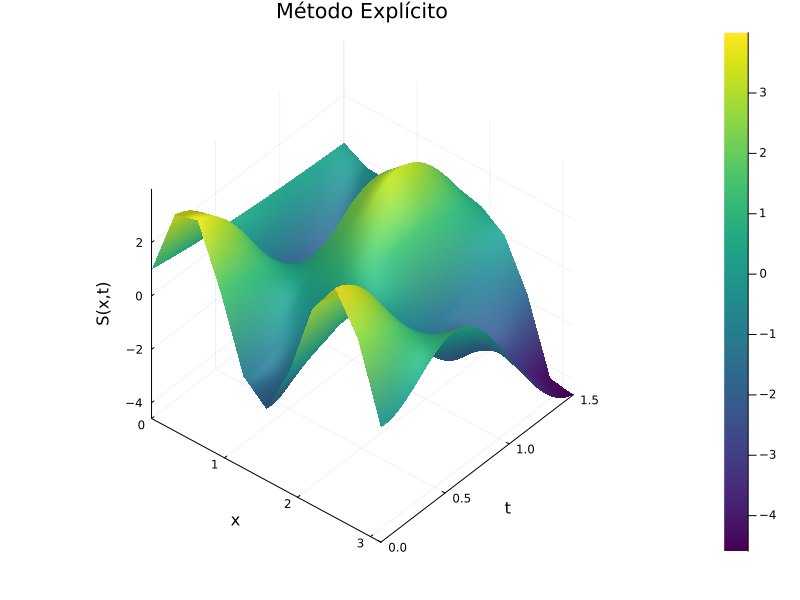

In [10]:
xs = LinRange(a, b, xn+1)
ys = LinRange(t_min, t_max, tn+1)   
surface(xs, ys, S, camera=(40,40),size=(800,600), c=:viridis, title="Método Explícito",xlabel="x",ylabel="t",zlabel="S(x,t)")

Graficando $S(x,t)$ con $x \in [0,\pi]$ y $t =1.5$

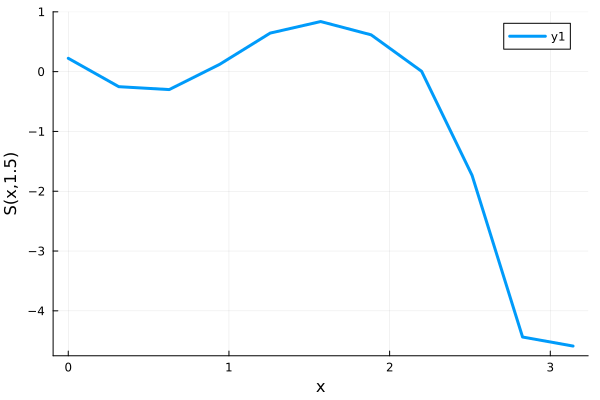

In [11]:
xs = LinRange(a, b, xn+1)
ys = S[tn+1,:]
plot(xs,ys,lw=3,xlabel = "x",ylabel = "S(x,1.5)", size = (600,400))